In [1]:
#emma puzza

<iframe width="560" height="315" src="https://www.youtube.com/embed/3YcNzHOBmk8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
import numpy as np
import int2d
import numpy.matlib as mlb


import matplotlib.pyplot as plb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
f = lambda x,y: 1./(1+5*(x**2+y**2))
#f = lambda x,y: (1./(1+(x**2)))*(1./(1+(y**2)))

In [4]:
# Define the function for computing Padova points
def _pdpts(n):
    xyrange = np.array([-1,1,-1,1])
    zn = (xyrange[0]+xyrange[1]+(xyrange[1]-xyrange[0])*
                        np.cos(np.linspace(0,1,n+1)*np.pi))/2
    zn1 = (xyrange[2]+xyrange[3]+(xyrange[3]-xyrange[2])*
                        np.cos(np.linspace(0,1,n+2)*np.pi))/2

    Pad1, Pad2 = np.meshgrid(zn,zn1)
    
    f1 = np.linspace(0,n,n+1)
    f2 = np.linspace(0,n+1,n+2)
    
    M1, M2 = np.meshgrid(f1,f2)
    h = np.array(np.mod(M1+M2,2))
    g = np.array(np.concatenate(h.T))
    
    findM = np.argwhere(g)
    
    Pad_x = np.concatenate(Pad1.T)[findM]
    Pad_y = np.concatenate(Pad2.T)[findM]
    #Pad_x = np.matrix(Pad_x)
    #Pad_y = np.matrix(Pad_y)
    
    return Pad_x.reshape(-1), Pad_y.reshape(-1)

In [5]:
def equisp_unisolv(n):
    xyrange = np.array([-1,1,-1,1])
    zn  = np.linspace(xyrange[0],xyrange[1],n+1)[::-1]
    zn1 = np.linspace(xyrange[2],xyrange[3],n+2)[::-1]

    X, Y = np.meshgrid(zn,zn1)
    
    f1 = np.linspace(0,n,n+1)
    f2 = np.linspace(0,n+1,n+2)
    
    f11 = np.linspace(-1,1,n+1)
    f22 = np.linspace(-1,1,n+2)
    
    #M1a, M2a = np.meshgrid(f11,f11)
    #M1aa = M1a.flatten()
    #M2aa = M2a.flatten()
    #M1a, M2a = np.meshgrid(f22,f22)
    #M3aa = M1a.flatten()
    #M4aa = M2a.flatten()
    
    M1, M2 = np.meshgrid(f1,f2)
    h = np.array(np.mod(M1+M2,2))
    g = np.array(np.concatenate(h.T))
    
    findM = np.argwhere(g)
    
    x = np.concatenate(X.T)[findM]
    y = np.concatenate(Y.T)[findM]
    
    M1, M2 = np.meshgrid(f11,f22)
    M1aa = M1.flatten()
    M2aa = M2.flatten()
    return x.reshape(-1), y.reshape(-1)#, M1aa, M2aa

In [6]:
def S(x,y):
    xyrange = np.array([-1,1,-1,1])
    # riporto a [0,1]
    xn = (x+1)/2
    yn = (y+1)/2
    X = (xyrange[0]+xyrange[1]+(xyrange[1]-xyrange[0])*
                        -1*np.cos(xn*np.pi))/2
    Y = (xyrange[2]+xyrange[3]+(xyrange[3]-xyrange[2])*
                        -1*np.cos(yn*np.pi))/2
    return X.reshape(-1), Y.reshape(-1)

In [7]:
N=10


pdx, pdy = _pdpts(N)
x, y = equisp_unisolv(N)

In [8]:
len(x)

66

In [9]:
x_f, y_f = S(x,y)

In [10]:
n_eval = N+50
X, Y = np.meshgrid(np.linspace(-1,1,n_eval),np.linspace(-1,1, n_eval))
X, Y = X.flatten(), Y.flatten()
f_true = f(X,Y).reshape(-1,1)

X_f, Y_f = S(X,Y)

In [11]:
fa, fb = np.meshgrid(np.linspace(-1,1,N+1),np.linspace(-1,1,N+2))
fa = fa.flatten()
fb = fb.flatten()

X1, Y1 = np.meshgrid(np.linspace(-1,1,N+1),np.linspace(-1,1, N+2))
X1, Y1 = X1.flatten(), Y1.flatten()

x_ff, y_ff = S(X1,Y1)

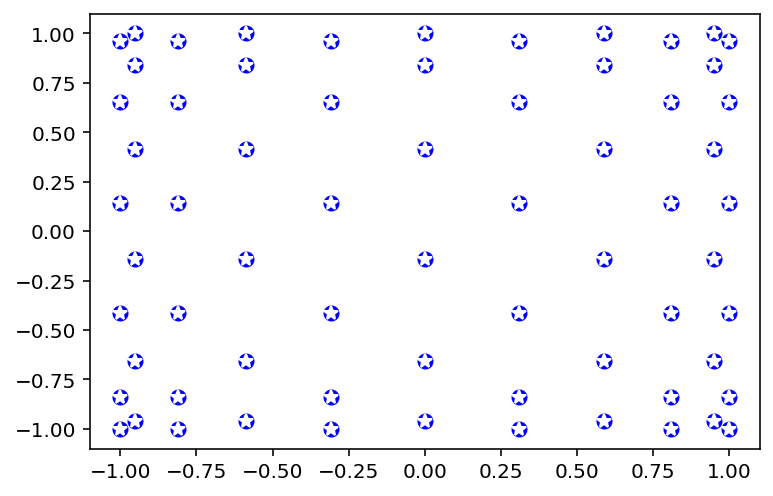

In [12]:
plt.plot(x_f, y_f, 'ob', markersize=7)
plt.plot(pdx, pdy, '*w', markersize=7)


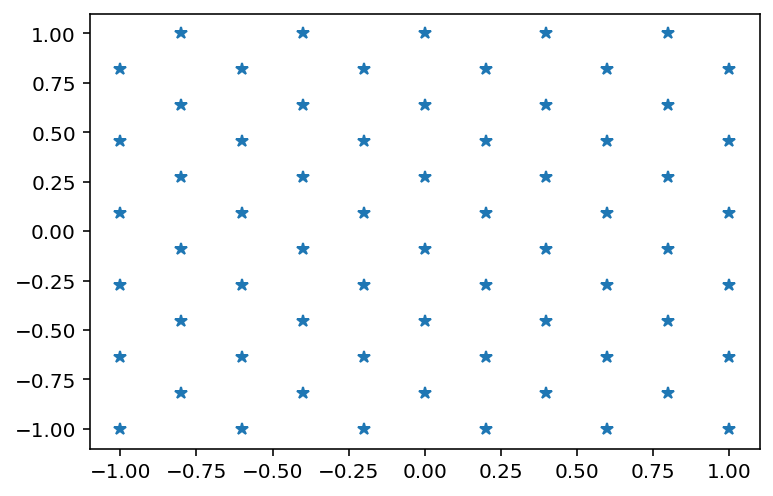

In [13]:
plt.plot(x, y, '*')

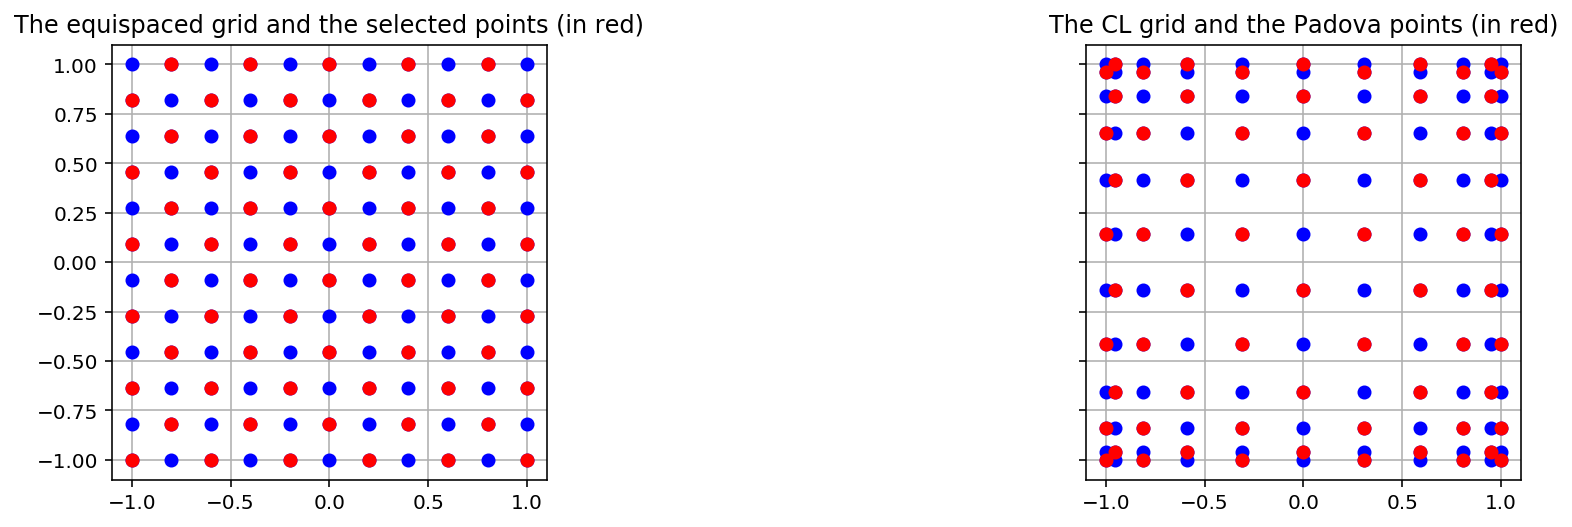

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(16)
ax1.plot(fa, fb, 'ob')
ax1.plot(x, y, 'or')

ax2.plot(x_ff, y_ff, 'ob')
ax2.plot(pdx, pdy, 'or')

ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')

ax1.set_title("The equispaced grid and the selected points (in red)")
ax2.set_title("The CL grid and the Padova points (in red)")
ax1.grid(); ax2.grid()
fig.savefig("grid.png")

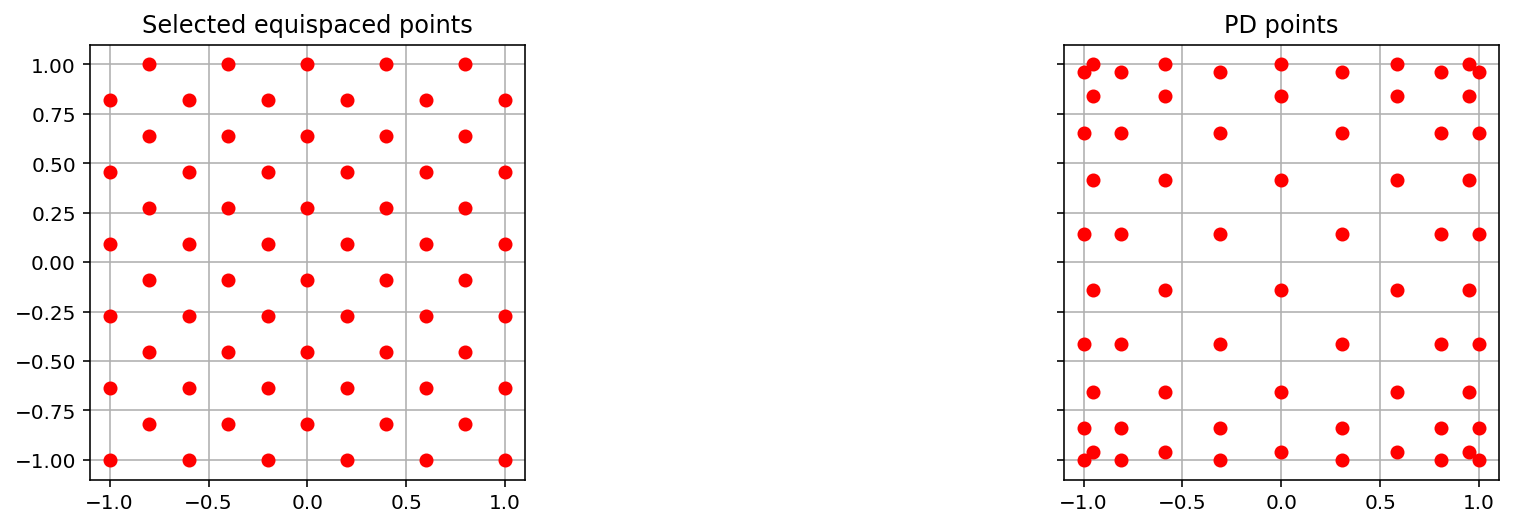

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(16)
#ax1.plot(fa, fb, 'ob')
ax1.plot(x, y, 'or')
ax2.plot(pdx, pdy, 'or')
#ax3.plot(x_f, y_f, 'or')

ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
#ax3.set_aspect('equal', 'box')

ax1.set_title("Selected equispaced points")
#ax2.set_title("Unisolvent equispaced subset")
ax2.set_title("PD points")
#ax3.set_title("Fake PD points")
ax1.grid(); ax2.grid(); #ax3.grid()
fig.savefig("grid2.png")

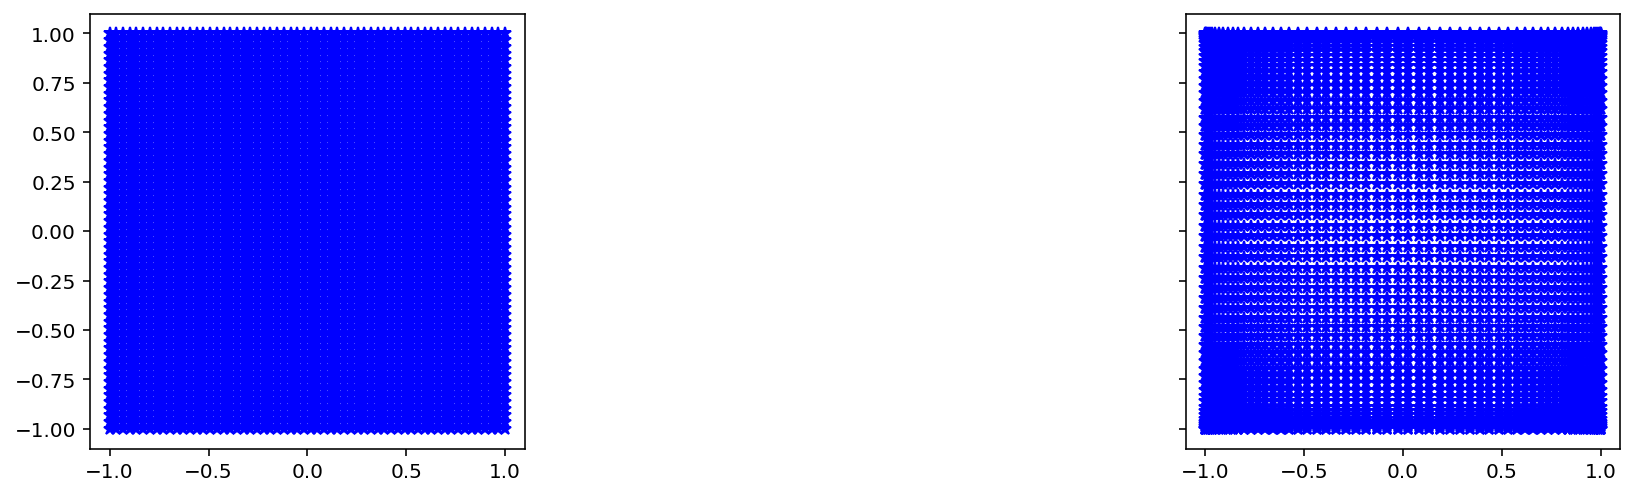

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(18)
ax1.plot(X.flatten(),Y.flatten(), 'b*')
ax2.plot(X_f.flatten(),Y_f.flatten(), 'b*')
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')

In [17]:
help(int2d._wamfit)

Help on function _wamfit in module int2d:

_wamfit(deg, wam, pts, fval)
    # Compute the coefficients for polynomial approximation



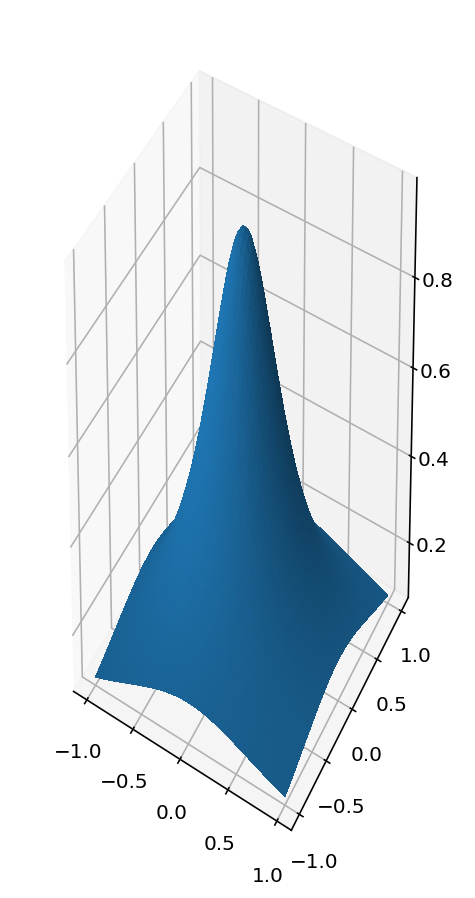

In [18]:
fig = plt.figure(figsize=plt.figaspect(2.))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_true.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False)

In [19]:
_, f_eq = int2d._wamfit(N, np.array([x, y]).T, np.array([X,Y]).T, f(x,y).reshape(-1,1))

In [20]:
np.linalg.norm(f_eq - f_true,np.inf)/np.linalg.norm(f_true,np.inf)

2.359892935413574

In [21]:
np.max(np.abs(f_eq - f_true))

2.3531330014822833

In [22]:
_, f_fake = int2d._wamfit(N, np.array([x_f, y_f]).T, np.array([X_f,Y_f]).T, f(x,y).reshape(-1,1))

In [23]:
np.linalg.norm(f_fake - f_true,np.inf)/np.linalg.norm(f_true,np.inf)

0.01685583637351402

In [24]:
np.max(np.abs(f_fake - f_true))

0.016807552682956833

In [25]:
_, f_PD = int2d._wamfit(N, np.array([pdx, pdy]).T, np.array([X,Y]).T, f(pdx,pdy).reshape(-1,1))

In [26]:
np.linalg.norm(f_PD - f_true)**2/n_eval

0.009829418545896548

In [27]:
np.max(np.abs(f_PD - f_true))

0.05963350476384166

(0, 1)

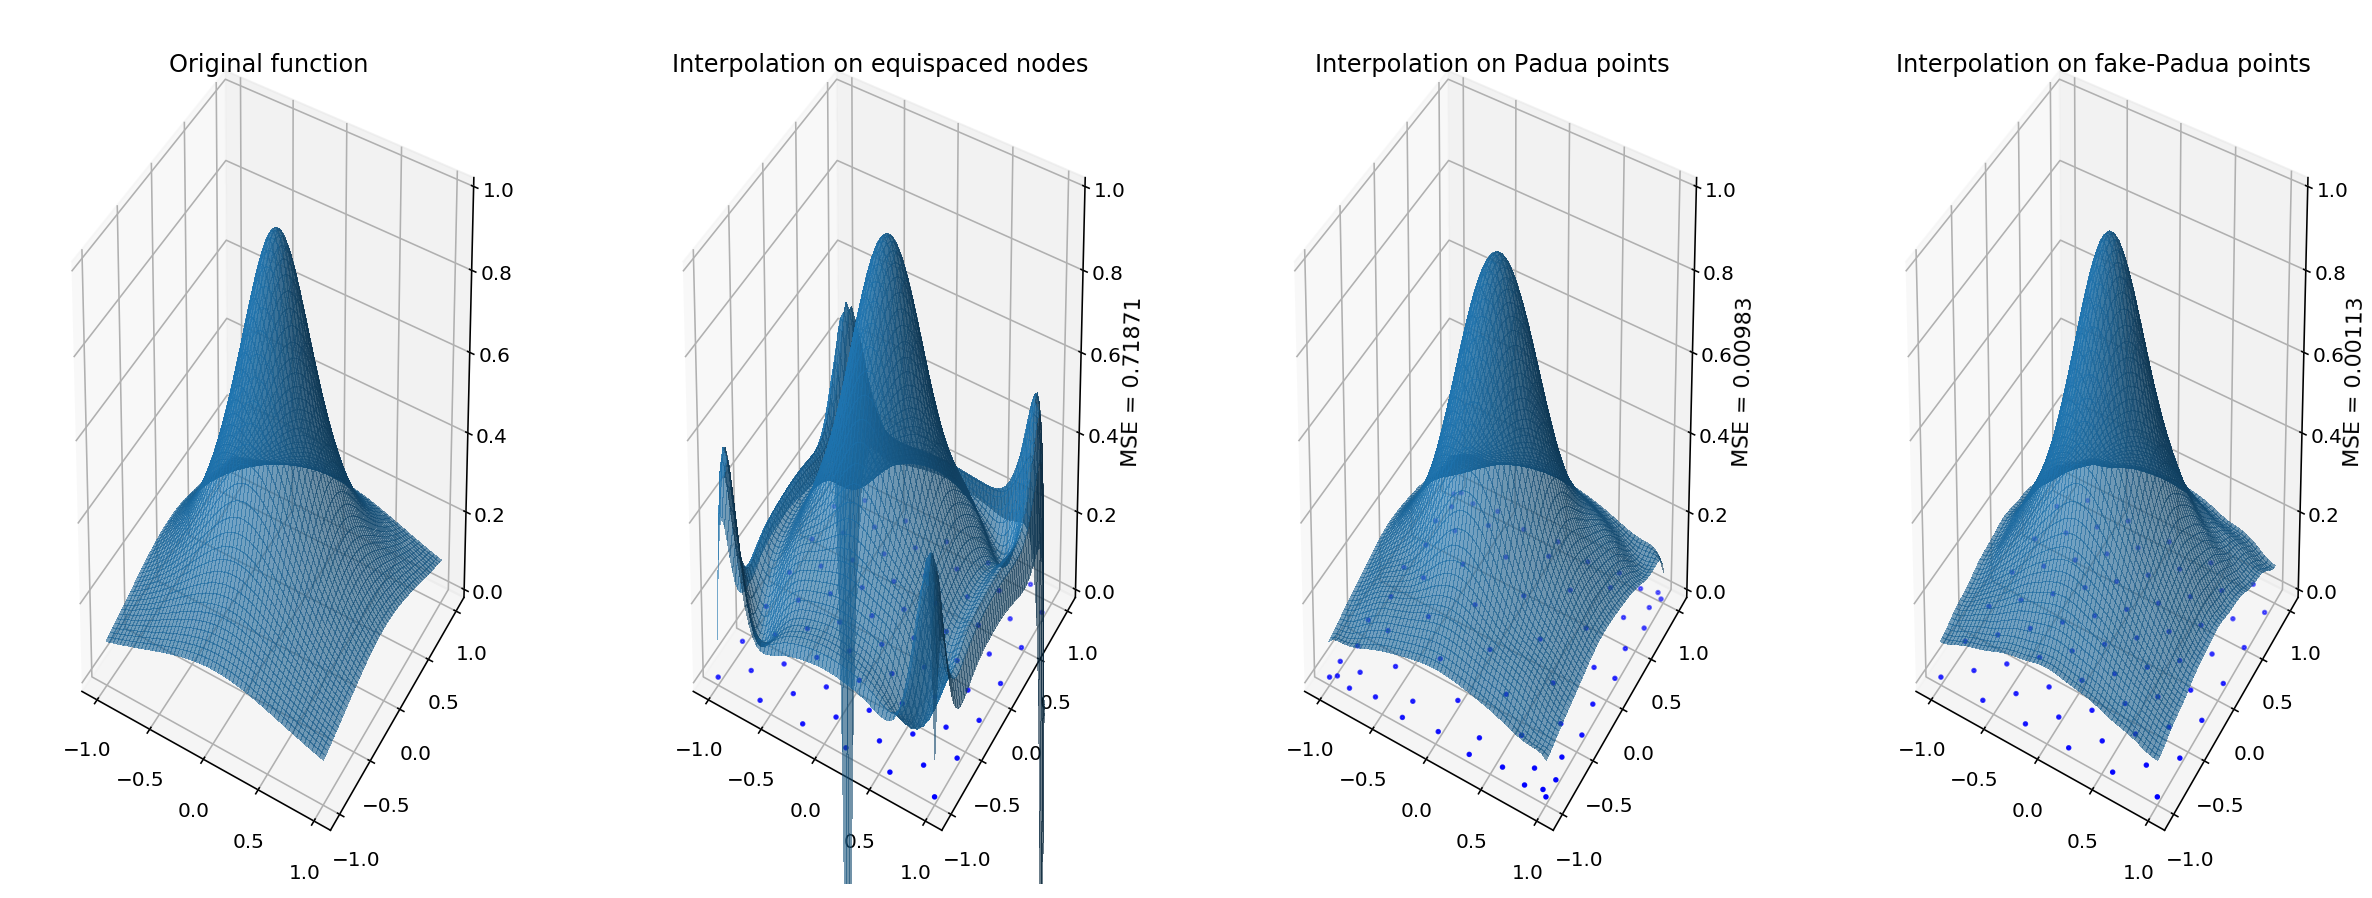

In [28]:
alpha = .6; s = 50

fig = plt.figure(figsize=(21,8))
ax1 = fig.add_subplot(1,4,1, projection='3d')
ax1.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_true.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
ax1.set_title("Original function")
ax1.set_zlim([0,1])
#ax1.scatter(X, Y, f_fake, c='r', marker = '.')
##
ax2 = fig.add_subplot(1,4,2, projection='3d')
ax2.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_eq.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
#ax2.scatter(x, y, f(x,y), c='r',s=s, marker = '*', zorder = 3)
ax2.scatter(x, y, 0, c='b',s=s//4, marker = '.')
ax2.set_title("Interpolation on equispaced nodes")
ax2.set_zlabel("MSE = %5.5f"%(np.linalg.norm(f_eq.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval), fontsize=11)
ax2.set_zlim([0,1])
##
ax3 = fig.add_subplot(1,4,3, projection='3d')
ax3.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_PD.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
#ax3.scatter(pdx, pdy, f(pdx,pdy), c='r', s=s, marker = '*', zorder = 3)
ax3.scatter(pdx, pdy, 0, c='b',s=s//4, marker = '.')
ax3.set_title("Interpolation on Padua points")
ax3.set_zlabel("MSE = %5.5f"%(np.linalg.norm(f_PD.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval), fontsize=11)
ax3.set_zlim([0,1])
##
ax4 = fig.add_subplot(1,4,4, projection='3d')
ax4.plot_surface(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), f_fake.reshape(n_eval,-1), rstride=1, cstride=1,
                       linewidth=0, antialiased=False, alpha = alpha)
#ax4.scatter(x, y, f(x,y), c='r', s=s, marker = '*', zorder = 3)
ax4.scatter(x, y, 0, c='b',s=s//4, marker = '.')
ax4.set_title("Interpolation on fake-Padua points")
ax4.set_zlabel("MSE = %5.5f"%(np.linalg.norm(f_fake.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval), fontsize=11)
ax4.set_zlim([0,1])
#fig.title(['Original function', 'a', 'b'])

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [0]:
fig = go.Figure(data=[go.Surface(x=X.reshape(n_eval,-1), y=Y.reshape(n_eval,-1), z=f_eq.reshape(n_eval,-1))])
fig.show()

In [0]:
alpha = .6; s = 50

In [0]:
fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]])
fig.add_trace(go.Surface(x=X.reshape(n_eval,-1), y=Y.reshape(n_eval,-1), z=f_eq.reshape(n_eval,-1)),
                        row=1, col=1)

fig.add_trace(go.Scatter3d(x=x, y=y, z=f(x,y), mode='markers', 
                           marker=dict(size=[.05],color=[0]))
              ,row=1, col=1)


fig.add_trace(go.Surface(x=X.reshape(n_eval,-1), y=Y.reshape(n_eval,-1), z=f_PD.reshape(n_eval,-1)),
                        row=1, col=2)

fig.add_trace(go.Scatter3d(x=pdx, y=pdy, z=f(pdx,pdy), mode='markers', 
                           marker=dict(size=[.05],color=[0]))
              ,row=1, col=2)


fig.add_trace(go.Surface(x=X.reshape(n_eval,-1), y=Y.reshape(n_eval,-1), z=f_fake.reshape(n_eval,-1)),
                        row=1, col=3)

fig.add_trace(go.Scatter3d(x=x, y=y, z=f(x,y), mode='markers', 
                           marker=dict(size=[.05],color=[0]))
              ,row=1, col=3)

#fig.update_layout(height=600, width=800, title_text="Subplots")
fig.show()

In [0]:
from scipy.io import savemat

In [0]:




savemat("plotta.mat")

In [0]:
fig.savefig("3D.png")

In [0]:
np.max(np.abs(f_PD - f_true))

In [0]:


fig,ax = plt.subplots()
plt.pcolormesh(X.reshape(n_eval,-1), Y.reshape(n_eval,-1), np.abs(f_fake.reshape(n_eval,-1)-f_PD.reshape(n_eval,-1)))